In [ ]:
'''Student Performance Analysis Using the Central Limit Theorem
You are a data analyst working with the Education Board’s
Assessment Division. The board is studying the reliability of
standardized test results for large groups of students. They
want to understand how sampling works and how the Central
Limit Theorem (CLT) can be applied to real-world education data.
#The department has provided you with a dataset of 1,000 student scores on a standardized test. Your task is to analyze
#the dataset, simulate different random samples, and demonstrate how sample means follow a normal distribution
even when the original data may not'''

In [ ]:
#1. Data Preparation & Loading
#• Create a Python list or array with 1,000 test scores(assume scores are between 0–100, distributed around amean of 70 with some variation).
#• Convert the list into a Pandas DataFrame for structured analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 1000 student test scores (mean=70, std=10, bounded between 0 and 100)
np.random.seed(42)  # reproducibility
scores = np.random.normal(loc=70, scale=10, size=1000)
scores = np.clip(scores, 0, 100)  # keep within 0-100

# Convert to DataFrame
df = pd.DataFrame(scores, columns=["Score"])
print(df.head())

       Score
0  74.967142
1  68.617357
2  76.476885
3  85.230299
4  67.658466


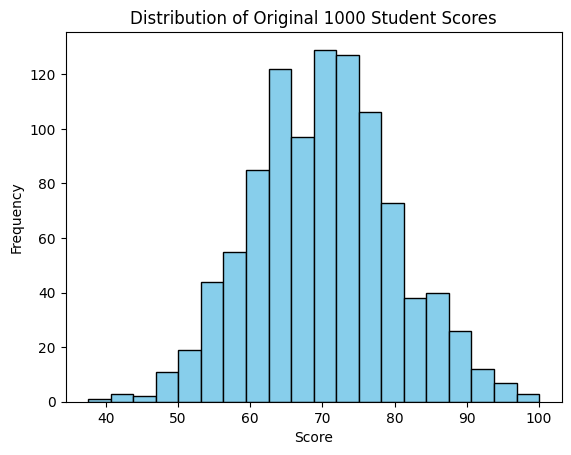

In [ ]:
#2.Data Exploration & Visualization
#• Plot a histogram of the original 1,000 student scores to observe their distribution.
#• Select random samples of different sizes (e.g., 30, 50, 100 students) and repeat the sampling at least 1,000 times.
#• Plot histograms of the sample means for each sample size.

# Histogram of original scores
plt.hist(df["Score"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Original 1000 Student Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

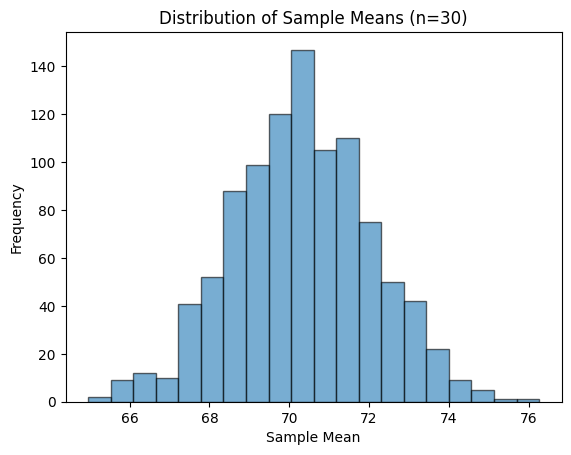

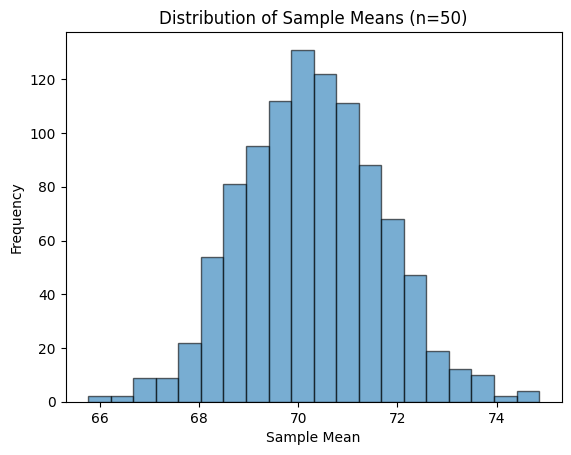

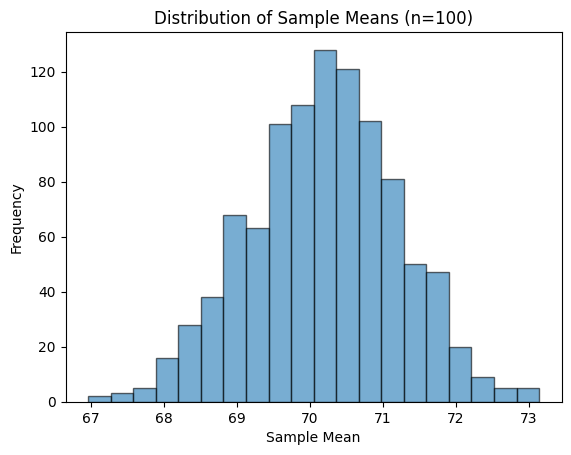

In [ ]:
def sample_means(sample_size, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = df["Score"].sample(sample_size, replace=True)
        means.append(sample.mean())
    return means

# Example: 30, 50, 100 students
sample_sizes = [30, 50, 100]
for size in sample_sizes:
    means = sample_means(size)
    plt.hist(means, bins=20, alpha=0.6, edgecolor='black')
    plt.title(f"Distribution of Sample Means (n={size})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# 3.Statistical Insight
#• Compute and display the mean, variance, and standard deviation of the original dataset.
#• Compare these values with the distribution of sample means.
#• Explain how the variability of the sample mean changesas sample size increase.

# Original dataset statistics
orig_mean = df["Score"].mean()
orig_var = df["Score"].var()
orig_std = df["Score"].std()

print("Original Dataset Statistics:")
print(f"Mean: {orig_mean:.2f}, Variance: {orig_var:.2f}, Std Dev: {orig_std:.2f}")

# Compare with sample means
for size in sample_sizes:
    means = sample_means(size)
    print(f"\nSample Size: {size}")
    print(f"Mean of Sample Means: {np.mean(means):.2f}")
    print(f"Variance of Sample Means: {np.var(means):.2f}")
    print(f"Std Dev of Sample Means: {np.std(means):.2f}")

Original Dataset Statistics:
Mean: 70.18, Variance: 95.26, Std Dev: 9.76

Sample Size: 30
Mean of Sample Means: 70.22
Variance of Sample Means: 2.88
Std Dev of Sample Means: 1.70

Sample Size: 50
Mean of Sample Means: 70.21
Variance of Sample Means: 1.98
Std Dev of Sample Means: 1.41

Sample Size: 100
Mean of Sample Means: 70.16
Variance of Sample Means: 0.94
Std Dev of Sample Means: 0.97


Enter a sample size (e.g., 25, 40, 75): 24


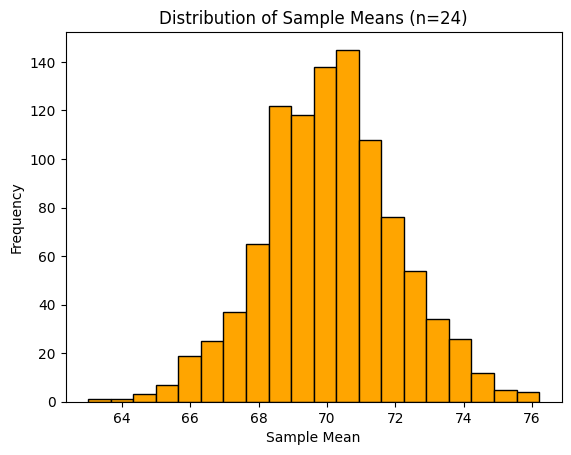

In [ ]:
#Adaptation
#• Allow the user to dynamically input the sample size(e.g., 25, 40, 75, etc.).
#• Generate a plot showing how the shape of the sampling distribution evolves with increasing sample sizes.
#• Provide a written interpretation:
# What does the histogram of sample means tell us about the Central Limit Theorem?
# How can education policymakers use this knowledge to design fairer exams or predict average performance with smaller groups of students?

#Dynamic input
sample_size = int(input("Enter a sample size (e.g., 25, 40, 75): "))
means = sample_means(sample_size)

plt.hist(means, bins=20, color='orange', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()